# Automatizce ve fyzice: OpenCV

Petr Čermák  
2024-10-31

# Úvod

## Co je OpenCV

-   Open source Computer vision knihovna
    -   licence BSD
-   Původně vyvinutá Intelem (2000)
    -   verze 1.0 v roce 2006
-   Od roku 2012 neziskovka OpenCV
-   Verze 4 (2018)
    -   C++ 11 (nativně)
-   https://opencv.org/
-   `conda install -c conda-forge opencv`
-   `pip install opencv-contrib-python`

### Použití:

-   zpracování obrazu
-   rozpoznání objektů
-   identifikace objektů
-   rozpoznání obličejů
-   gesta
-   motion tracking
-   robotika (hlavní framework pro ROS)

Nová verze každý půlrok

## Alternativy

-   MATLAB nevýhody
    -   není specialně pro obrázky
    -   mnohem pomalejší
    -   náročnější na systémové zdroje
    -   closed source
-   výhody
    -   má lepší memory management
    -   Python binding měl problémy

## Modulární struktura

-   `core`
-   `imgproc`
    -   filtrování, histogramy
-   `video`
    -   object tracking
-   `highgui`
    -   základní gui (více v QT)
-   `calib3d`
-   `features2d`
    -   popisování obrázků, hledání tvarů

-   `objdetect`
    -   obličeje, oči, lidi
-   `ml` - machine learning, klastrování, třídění
-   `gpu`
-   `ccl` - akcelerace pomocí opencl

# Základní příkazy

## Otevírání obrázků

In [1]:
import cv2 as cv
cv.__version__

'4.10.0'

. . .

In [2]:
# ve skriptu
img = cv.imread("check.png")
cv.imshow('checker', img)
cv.waitKey(0)

. . .

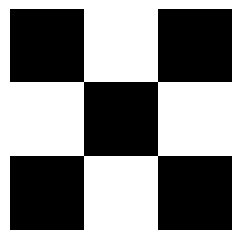

In [3]:
# v notebooku
import matplotlib.pyplot as plt
%matplotlib inline
img = cv.imread("check.png")
plt.figure(figsize=(3,3))
plt.axis('off')
plt.imshow(img)
plt.show()

## Operace s obrázky

In [4]:
def rescale(img, scale = 0.5):
  width = int(img.shape[1] * scale)
  height = int(img.shape[0] * scale)

  return cv.resize(img, (width, height), interpolation=cv.INTER_AREA)

. . .

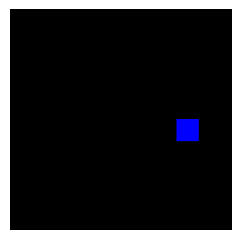

In [5]:
import numpy as np

nic = np.zeros((200,200,3), dtype='uint8')
nic[100:120,150:170] = 0,0,255
plt.figure(figsize=(3,3)); plt.axis('off')
plt.imshow(nic)
plt.show()

## Kreslení

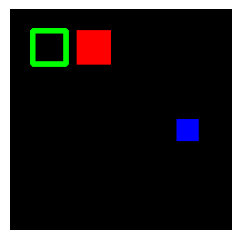

In [6]:
cv.rectangle(nic, (20,20), (50,50), (0,255,0), thickness=3)

cv.rectangle(nic, (60,20), (90,50), (255,0,0), thickness=-1)
plt.figure(figsize=(3,3)); plt.axis('off')
plt.imshow(nic)
plt.show()

## Kreslení

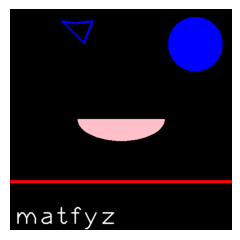

In [7]:
nic2 = np.zeros((512,512,3), np.uint8)
cv.circle(nic2,(427,83), 63, (0,0,255), thickness=-1)
cv.line(nic2,(0,400),(511,400),(255,0,0),thickness=5)
# elipsa se středem, velikostí os, rotace, začátek a konec elipsy v úhlech
cv.ellipse(nic2,(256,256),(100,50),0,0,180,(255,192,202),-1)
pts = np.array([[150,35],[120,30],[170,80],[190,30]], np.int32)
cv.polylines(nic2,[pts],True,(0,0,255),thickness=3)

font = cv.FONT_HERSHEY_PLAIN
cv.putText(nic2,'matfyz',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)
plt.figure(figsize=(3,3)); plt.axis('off')
plt.imshow(nic2)
plt.show()

Polylines - třetí argument uzávírá shape

## Rozostření

-   **kernel** - plovoucí rozostřovací okno
-   `cv.blur` - jen průměr
-   `cv.GaussianBlur` - vážený průměr gaussovkou - více přirozené
-   `cv.medianBlur` - medián, kernel čtverec (!),
    -   zachovává okraje
    -   dobré na přepálené pixely
-   `cv2.bilateralFilter`
    -   ještěš lepší zachování okrajů
    -   pomalé
    -   dvě gaussovky
    -   bere v potaz jen podobné pixely (dle intenzity, barvy…)

$$
I_{\text{blur}}(x, y) = \frac{1}{k_w \cdot k_h} \sum_{i,j} I(x+i, y+j)
$$

$$
  B = \frac{1}{25} \begin{pmatrix}1 & 1 & 1 & 1 & 1 \\1 & 1 & 1 & 1 & 1 \\1 & 1 & 1 & 1 & 1 \\1 & 1 & 1 & 1 & 1 \\1 & 1 & 1 & 1 & 1 \\ \end{pmatrix}
$$

$$
  G(x, y) = \displaystyle\frac{1}{2\pi\sigma}e^{-\frac{x^{2} + y^{2}}{2\sigma^{2}}}
$$

$$
\begin{multline}
I_{\text{bil}}(x, y) = \frac{1}{W_p} \sum_{i,j} I(x+i, y+j) \\
  \cdot G(i, j) \cdot G_{int}(|I(x, y) - I(x+i, y+j)|)
\end{multline}
$$

## Rozostření

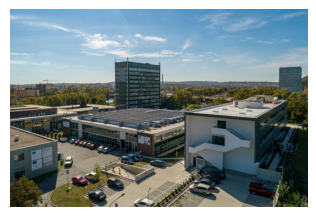

In [8]:
img = cv.imread("troja.jpg")
img = rescale(img, 0.3)
img = cv.cvtColor(
    img, cv.COLOR_BGR2RGB
  )
plt.figure(figsize=(4,4)); 
plt.imshow(img);plt.axis('off')
plt.show()

. . .

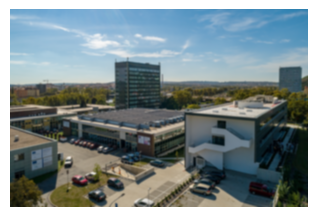

In [9]:
blur = cv.GaussianBlur(
    img, (13,13), 5
  )
plt.figure(figsize=(4,4)); 
plt.imshow(blur);plt.axis('off')
plt.show()

## Hrany - Canny

-   předzpracování (Gauss, Medián)
-   gradienty (Sobelovy filtry - má **jádro**)
-   vyhodnocení gradientů (směry a intenzity)
-   prahování (minimální a maximální)
    -   *min* nikdy, *max* vždy
    -   to co je mezi tak jen když je spojeno s *max*
-   spojení hran (analýza sousedních pixelů)

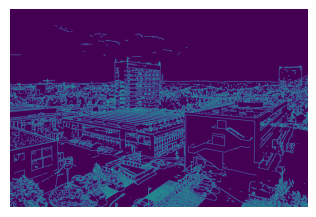

In [10]:
canny = cv.Canny(img, 125, 175)
plt.figure(figsize=(4,4)); 
plt.imshow(canny);plt.axis('off')
plt.show()

## Hrany - vylepšení

Pouze na binárních obrazech

Dilatace

-   `cv.dilate`
-   rozšiřuje bílé oblasti
-   opět využití jádra
-   aspoň jeden bílý -\> bílý výstup
-   vyplňuje díry, praskliny
-   lze více iterací

Eroze

-   `cv.erode`
-   jeden pixel není bílý -\> černá
-   odstraní šum
-   oddělí objekty
-   inverzní k dilataci

## Prahování (Treshold)

-   rozdělení pixelů na dvě kategorie na základě určité metriky
-   základní varianta: vše nad hodnotou prahu je černé

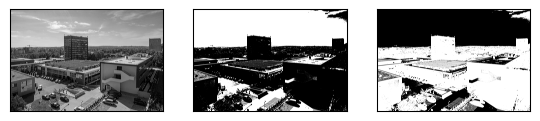

In [11]:
img = cv.imread('troja.jpg', cv.IMREAD_GRAYSCALE)
_,t1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
_,t2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
images = [img, t1, t2]
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
 plt.xticks([]),plt.yticks([])

## Prahování (Treshold)

-   mnohem praktičtější je adaptivní prahování!
-   hodnota prahu se počítá podle okolí (*block*) - *C*

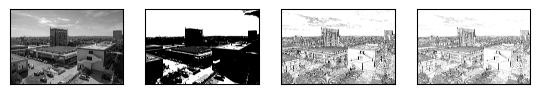

In [12]:
img = cv.imread('troja.jpg', cv.IMREAD_GRAYSCALE)
img = cv.medianBlur(img,5)
_,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
 cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv.THRESH_BINARY,11,2)
images = [img, th1, th2, th3]
for i in range(4):
 plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
 plt.xticks([]),plt.yticks([])
plt.show()

## Obrysy

-   `cv.findContours`
-   nalezení hran objektů v binárním obraze
-   režim (`mode`)
    -   RETR_EXTERNAL (vnější)
    -   RETR_LIST (vše)
    -   RETR_CCOMP (tvary s dírami)
    -   RETR_TREE (vše ve stromové struktuře)
-   aproximace (`method`)
    -   CHAIN_APPROX_NONE (žádná)
    -   CHAIN_APPROX_SIMPLE
        -   spojení rovných čar
        -   vhodné pro polygony, rychlé

-   CHAIN_APPROX_TC89_L1
    -   více přesné, nejen polygony
    -   začne někde na okraji objektu
    -   hledá tangenty v tom bodě (L1 metrika)
    -   vynechá body na tangentě
    -   prochází dokola všechny body
-   CHAIN_APPROX_TC89_KCOS
    -   aproximuje na záladě úhlu
    -   nejpomalejší

## Obrysy

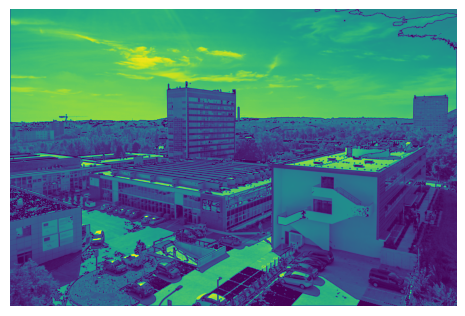

In [13]:
contours, hierarchy = cv.findContours(  
    th1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE
  )

th1c = cv.drawContours(img, contours, -1, (0, 255, 0), 5)

plt.figure(figsize=(6,6)); 
plt.imshow(th1c);plt.axis('off')
plt.show()

## Souhrn

vstup ⇒ gray ⇒ blur

1.  ⇒ hrany ⇒ vylepšení hran
2.  ⇒ práh

⇒ obrysy ⇒ profit

. . .

### Otázka

Jaký je rozdíl mezi hranou (edge) a obrysem (contour)?

# Úkol #2 - mikroskop

## Zadání

-   Vytvořit skript, který
    -   stáhne data

    -   u každého objektu zjistí:

        -   těžiště (X,Y)
        -   obsah (S)

    -   seřaďte objekty podle plochy od největšího

    -   vytvořit jeden ASCII soubor ve formátu:

        `filename, číslo tvaru, X, Y, S`

-   Tipy:
    -   souřadnice (0,0) je levý dolní roh
    -   jednotky: mm, resp mm2
    -   pozor, mm-papír je různě velký
    -   využít gitlab VARIABLE \$MFF_UKOL = 2

``` {yml}
  rules:
    - if: $MFF_UKOL == "2"
      when: always
    - when: never
```

<https://user.mgml.eu/automation/microscope/>